### Alejo Vinluan (abv210001)
# Text Classification

This notebook focuses on finding out whether a news article is real or fake given the title, text, and subject of the article. It will utilize sklearn by using Naive Bayes, Logistic Regression, and Neural Networks to predict whether or not the articles are real or fake.

## Dataset Breakdown
The dataset gives the following columns:

* title - The title of the article

* text - The contents of the article

* subject - What the news article covers (news, politics, etc.)

* date - The date the article was posted

* real - Boolean value stating whether article is real or fake


The columns title, text, and subject will be used in order to analyze the dataset with sklearn. The original dataset is over 40,000 rows so only 10,000 of the rows will be randomly selected in order to save on processing power.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/Combined.csv')
# Source: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

# Ignore the 'date' column
data = data.drop(columns=['date', 'title', 'subject'])

# Sample only 10,000 rows of the dataset
data = data.sample(n=10000, random_state=123)

# Drop rows if missing values exist
data = data.dropna()

# Split data into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(data['text'], data['real'], test_size=0.2, random_state=123)

test, train = train_test_split(data, test_size=0.2, random_state=123)

## Distribution of Real Articles vs Fake
The following pie chart shows the distribution of the dataset of real articles and fake articles.

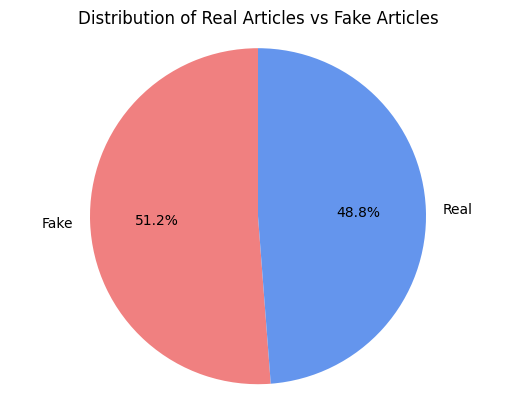

In [3]:
# Get how many values in 'real' column are 0 or 1
values = data['real'].value_counts()

# Create the pie chart
import matplotlib.pyplot as plt

labels = ['Fake', 'Real']
sizes = [values[0], values[1]]
colors = ['lightcoral', 'cornflowerblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Real Articles vs Fake Articles')
plt.show()


The pie chart shows that 48.8% of our dataset are real articles while 51.2% of the articles are fake.

## SKLearn

SKLearn (Scikit-learn) is an open source library in Python used for data analysis and machine learning. It has the capability of performing the classification algorithms that will be used in this notebook: Naive Bayes, Logistic Regression, and Neural Networks.

## Pre-Process Text

The text needs to be pre-processed in order to utilize the classification algorithms. In this instance, the text will be broken down into Bag of words representations. 

SKLearn uses Bag of Words by giving each word an ID within the training set. Then, it will count the number of occurences of that specific word. Bag of Words are generally used for high-dimensional sparse dataests.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Utilize Bag of Words for each column in the train and test set
count_vect = CountVectorizer()

# Transform the training data into Bag of Words
x_train = count_vect.fit_transform(x_train)
x_test = count_vect.transform(x_test)

## Naive Bayes

Naive Bayes utilizes Bayes Theorem to make a classification. It will assume each of the columns are independent of each other.

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()
nb.fit(x_train, y_train)

predictions = nb.predict(x_test)

accuracy = accuracy_score(y_test, predictions)


0.973
